# The role of Reddit users in financial market dynamics

In [ ]:
! pip install yfinance

In [ ]:
! pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.2 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import zstandard
import os
import json
import sys
import logging.handlers
import re
from datetime import datetime, time
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import time as t

## 0. Data transformation

In [ ]:
# Getting posts
if __name__ == "__main__":
    file_path = 'wallstreetbets_submissions.zst'
    output_file_path = 'output.json'
    file_size = os.stat(file_path).st_size
    file_lines = 0
    file_bytes_processed = 0
    created = None
    field = "subreddit"
    value = "wallstreetbets"
    bad_lines = 0
    output_data = []

    for line, file_bytes_processed in read_lines_zst(file_path):
        try:
            obj = json.loads(line)
            created = datetime.utcfromtimestamp(int(obj['created_utc']))
            temp = obj[field] == value
            output_data.append(obj)
        except (KeyError, json.JSONDecodeError) as err:
            bad_lines += 1
        file_lines += 1
        if file_lines % 100000 == 0:
            log.info(f"{created.strftime('%Y-%m-%d %H:%M:%S')} : {file_lines:,} : {bad_lines:,} : {file_bytes_processed:,}:{(file_bytes_processed / file_size) * 100:.0f}%")

    # Save the JSON data to the output file
    with open(output_file_path, 'w') as output_file:
        json.dump(output_data, output_file)

    log.info(f"Complete : {file_lines:,} : {bad_lines:,}")

In [ ]:
# Key words
keywords = ['gme', 'gamestop', 'gamestonk']

# Compiling a regular expression pattern for case-insensitive search
pattern = re.compile(r'\b(?:{})\b'.format('|'.join(re.escape(word) for word in keywords)), re.IGNORECASE)

# Filter posts that contain the keywords
filtered_posts = [post for post in data if pattern.search(post['title']) or pattern.search(post['selftext'])]

In [ ]:
# Edit the date field
for post in filtered_posts:
    try:
        utc_timestamp = int(post['created_utc'])  # Try to convert to integer
        post['created_utc'] = datetime.fromtimestamp(utc_timestamp).strftime('%Y-%m-%d %H:%M:%S')
    except ValueError:  # Skip if conversion fails
        pass

for post in filtered_posts:
    if not isinstance(post['created_utc'], datetime):
        post['created_utc'] = datetime.strptime(post['created_utc'], '%Y-%m-%d %H:%M:%S')

In [ ]:
# Choosing the right dates
start_date = datetime.strptime('2020-11-27', '%Y-%m-%d')
end_date = datetime.strptime('2021-02-03', '%Y-%m-%d')

filtered_posts_2 = [post for post in filtered_posts if start_date <= post['created_utc'] <= end_date]

In [ ]:
# Save the updated list of dictionaries to a JSON file
with open('output2.json', 'w') as output_file:
    json.dump(filtered_posts_2, output_file)

In [ ]:
# Getting comments
names = set([d['name'] for d in filtered_posts_2])

if __name__ == "__main__":
    file_path = 'wallstreetbets_comments-001.zst'
    output_file_path = 'comments3.json'
    file_size = os.stat(file_path).st_size
    file_lines = 0
    file_bytes_processed = 0
    created = None
    bad_lines = 0
    output_data = []

    for line, file_bytes_processed in read_lines_zst(file_path):
        try:
            obj = json.loads(line)
            created = datetime.utcfromtimestamp(int(obj['created_utc']))

            # Check if 'parent_id' exists in the object and if its value is in the names list
            if 'link_id' in obj and obj['link_id'] in names:
                output_data.append(obj)

        except (KeyError, json.JSONDecodeError) as err:
            bad_lines += 1

        file_lines += 1
        if file_lines % 100000 == 0:
            log.info(f"{created.strftime('%Y-%m-%d %H:%M:%S')} : {file_lines:,} : {bad_lines:,} : {file_bytes_processed:,}:{(file_bytes_processed / file_size) * 100:.0f}%")

    # Save the filtered data to output file
    with open(output_file_path, 'w') as output_file:
        json.dump(output_data, output_file)

    log.info(f"Complete : {file_lines:,} : {bad_lines:,}")

In [ ]:
# Data filtering to compress the file

with open('comments3.json', 'r') as f:
    comments = json.load(f)

desired_keys = ['id', "author", "author_fullname",'body', "created_utc", "parent_id", "link_id", "subreddit_id", "total_awards_received"]

filtered_data = []

for item in comments:
    filtered_item = {key: item[key] for key in desired_keys if key in item}
    filtered_data.append(filtered_item)

with open("filtered_comments.json", "w") as output_file:
    json.dump(filtered_data, output_file, indent=4)


## 1. Data exploration

In [ ]:
# link to the file with submissions  https://drive.google.com/file/d/14DdxjVeTeiohR7JzAITqJiCMJsTPfuZI/view?usp=drive_link

! gdown 14DdxjVeTeiohR7JzAITqJiCMJsTPfuZI

Downloading...
From: https://drive.google.com/uc?id=14DdxjVeTeiohR7JzAITqJiCMJsTPfuZI
To: /content/output2.json
100% 416M/416M [00:05<00:00, 69.5MB/s]


In [ ]:
# link to the filtered file with comments https://drive.google.com/file/d/1xlB1NXwx3FrucWCmyJ_hsq-BnDGfxfYI/view?usp=share_link

! gdown 1xlB1NXwx3FrucWCmyJ_hsq-BnDGfxfYI

Downloading...
From: https://drive.google.com/uc?id=1xlB1NXwx3FrucWCmyJ_hsq-BnDGfxfYI
To: /content/filtered_comments.json
100% 1.58G/1.58G [00:19<00:00, 80.9MB/s]


In [ ]:
with open('output2.json', 'r') as f:
    posts = json.load(f)

In [ ]:
with open('filtered_comments.json', 'r') as f:
    comments = json.load(f)

In [ ]:
#check the number of posts and comments
print('Number of posts:', len(posts))
print('Number of comments:', len(comments))

Number of posts: 138766
Number of comments: 4209560


In [ ]:
# count deleted posts

deleted_count = 0

# Iterate through the posts and count deleted or removed selftext
for post in posts:
    if 'selftext' in post and (post['selftext'] == '[deleted]' or post['selftext'] == '[removed]'):
        deleted_count += 1

print('Number of deleted posts:', deleted_count)

Number of deleted posts: 99133


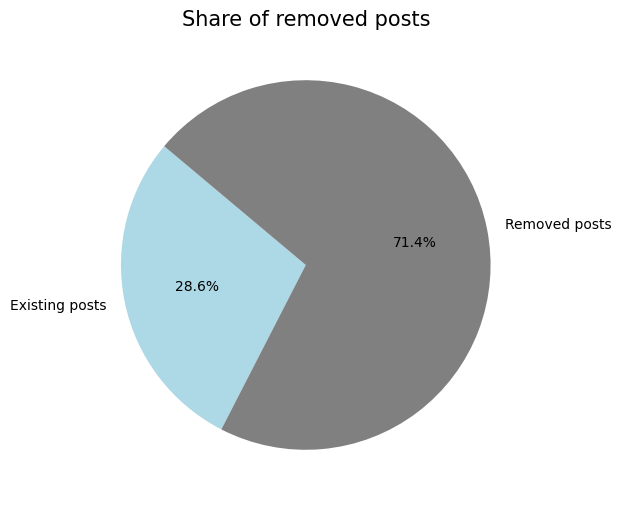

In [ ]:
# create a pie chart of deleted posts

labels = ['Existing posts', 'Removed posts']
sizes = [(1 - deleted_count/len(posts)), (deleted_count/len(posts))]
colors = ['lightblue', 'gray']

plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Share of removed posts', fontsize=15)
plt.show();

In [ ]:
#count deleted comments

deleted_comments = 0

# Iterate through the posts and count deleted or removed selftext
for comment in comments:
    if 'body' in comment and (comment['body'] == '[deleted]' or comment['body'] == '[removed]'):
        deleted_comments += 1

print('Number of deleted posts:', deleted_comments)

Number of deleted posts: 1287183


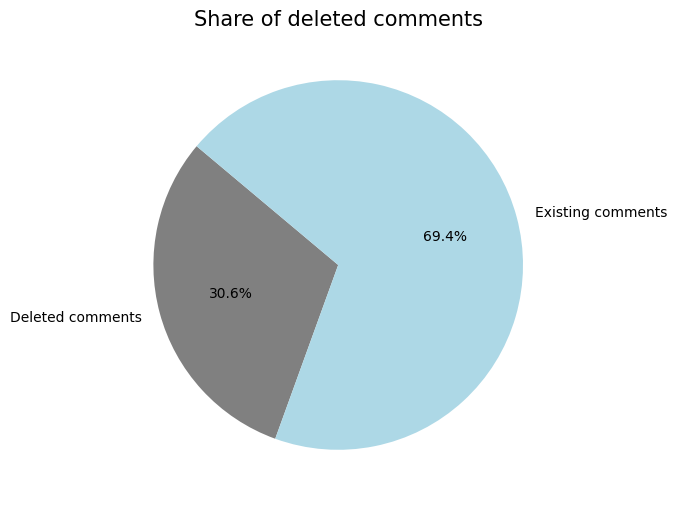

In [ ]:
# Create a pie chart of deleted comments

labels = ['Deleted comments', 'Existing comments']
sizes = [(deleted_comments/len(comments)), (1 - deleted_comments/len(comments))]
colors = ['gray', 'lightblue']

plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Share of deleted comments', fontsize=15)
plt.show();

## Parsing GameStop shares daily prices
- Retrieve GameStop daily prices from Yahoo Finance from September 29, 2020 to August 16, 2021 (the main period of Gamestop short squeeze and available reddit data)
- We retrieved GameStop daily prices from Yahoo Finance, using the Python library yfinance, and computed the daily price return as the daily relative change, r(t) = p(t)/p(t-1), where p(t) is the Open price at day t.
- The period over which our study focuses its attention (from November 27, 2020 to February 3, 2021) includes 99% of the posts and 98% of the comments submitted since January 1, 2016 until February 3, 2021.

In [ ]:
# define the ticker for GameStop
stock_symbol = "GME"

# define the start and end dates
start_date = datetime(2020, 9, 29)
end_date = datetime(2021, 8, 17)

#retrieve the data
gme_data = yf.download(stock_symbol, start=start_date, end=end_date)

gme_prices = pd.DataFrame(gme_data)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#check
gme_prices = gme_prices.reset_index()
gme_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-29,2.5000,2.6625,2.4825,2.5875,2.5875,20950400
1,2020-09-30,2.5625,2.6900,2.5150,2.5500,2.5500,24316000
2,2020-10-01,2.5225,2.5625,2.4225,2.4425,2.4425,18216400
3,2020-10-02,2.3450,2.4450,2.3250,2.3475,2.3475,17362000
4,2020-10-05,2.3600,2.3975,2.3125,2.3650,2.3650,11220000


In [ ]:
len(gme_prices)

222

In [ ]:
# compute daily relative change, r(t) = p(t)/p(t-1), where p(t) is the Open price at day t.

gme_prices['daily_change'] = gme_prices['Open'] / gme_prices['Open'].shift(1)
gme_prices['Date'] = pd.to_datetime(gme_prices['Date'])
gme_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_change
0,2020-09-29,2.5000,2.6625,2.4825,2.5875,2.5875,20950400,NaN
1,2020-09-30,2.5625,2.6900,2.5150,2.5500,2.5500,24316000,1.025000
2,2020-10-01,2.5225,2.5625,2.4225,2.4425,2.4425,18216400,0.984390
3,2020-10-02,2.3450,2.4450,2.3250,2.3475,2.3475,17362000,0.929633
4,2020-10-05,2.3600,2.3975,2.3125,2.3650,2.3650,11220000,1.006397


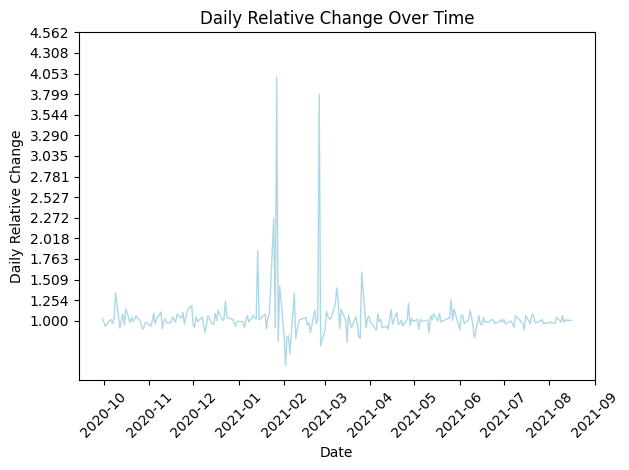

In [ ]:
# plot of gme stock prices

plt.plot(gme_prices['Date'], gme_prices['daily_change'], marker='', linestyle='-', color='lightblue', linewidth=1)
plt.title('Daily Relative Change Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Relative Change')
plt.xticks(rotation=45)

num_ticks = 15
max_relative_change = gme_prices['daily_change'].max() - 1  # Subtract 1 to get the range relative to 1
min_relative_change = gme_prices['daily_change'].min() - 1
step = (max_relative_change - min_relative_change) / (num_ticks - 1)
yticks = [1 + i * step for i in range(num_ticks)]  # Add 1 back to the tick values
plt.yticks(yticks)

plt.tight_layout()
plt.show()

In [ ]:
# filter period over which our study focuses its attention (from November 27, 2020 to February 3, 2021)

start_date = '2020-11-27'
end_date = '2021-02-03'
filtered_prices = gme_prices.loc[(gme_prices['Date'] >= start_date) & (gme_prices['Date'] <= end_date)]
len(filtered_prices)

46

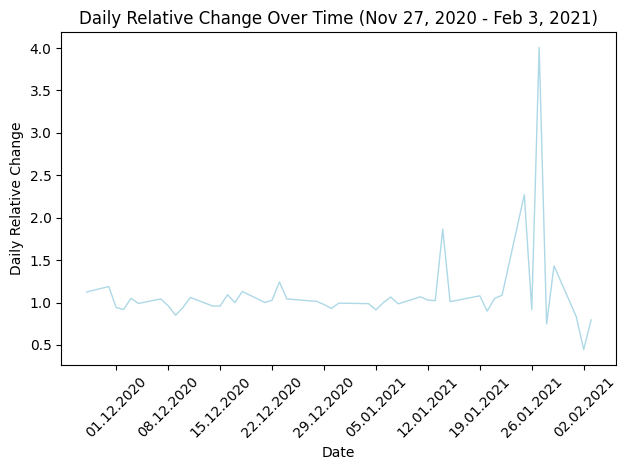

In [ ]:
plt.plot(filtered_prices['Date'], filtered_prices['daily_change'], marker='', linestyle='-', color='lightblue', linewidth=1)
plt.title('Daily Relative Change Over Time (Nov 27, 2020 - Feb 3, 2021)')
plt.xlabel('Date')
plt.ylabel('Daily Relative Change')
plt.xticks(rotation=45)

x_dates = pd.date_range(start='2020-12-01', end='2021-02-02', freq='7D')

plt.xticks(x_dates, [date.strftime('%d.%m.%Y') for date in x_dates])

plt.tight_layout()
plt.show()

**Data variables inside post**:
- Selftext (body)
- Flairs to posts: a set of community-defined tags to define the semantic scope of the post, thus facilitating content search and filtering
- Awards to posts or comments to recognize their value. Awards are sold by Reddit for money, they come in a variety of types, and some of them reward the recipient with money or perks such as access to exclusive subreddits.

In [ ]:
with open('gme_submissions.json', 'r') as f:
    gme_submissions = json.load(f)

In [ ]:
# filtering json file to only keep crucial features

fields_to_keep = ['id', "author", 'author_flair_text', 'link_flair_css_class',
                  'num_comments', 'selftext', 'title', 'retrieved_utc', "url", 'created_utc']

filtered_data = []
for entry in gme_submissions:
    filtered_entry = {field: entry.get(field) for field in fields_to_keep}
    filtered_data.append(filtered_entry)

In [ ]:
# change the Unix time in created_utc into the datetime

for entry in filtered_data:
    postdate_str = entry.get('created_utc')
    if postdate_str is not None:
        postdate = datetime.fromisoformat(postdate_str)
        entry['date'] = postdate.date().isoformat()

#### (submissions_features.json is the one to continue work with!)

In [ ]:
# Save the updated data back to the JSON file (submissions_features.json is the one to continue work with!)
updated_file_path = 'submissions_features.json'
with open(updated_file_path, 'w') as updated_json_file:
    json.dump(filtered_data, updated_json_file, indent=4)

# 2. Quantifying commitment

In [ ]:
with open('submissions_features.json', 'r') as f:
    submissions_data = json.load(f)

len(submissions_data)

138766

In [ ]:
submissions_data[0]

{'id': 'k1phz2',
 'author': 'SnooWalruses7854',
 'author_flair_text': None,
 'link_flair_css_class': 'question',
 'num_comments': 21,
 'selftext': '[removed]',
 'title': 'I guess the GME short squeeze is over??',
 'retrieved_utc': 1623088871,
 'url': 'https://www.reddit.com/r/wallstreetbets/comments/k1phz2/i_guess_the_gme_short_squeeze_is_over/',
 'created_utc': '2020-11-27T00:07:12',
 'date': '2020-11-27'}

#### plot 1: (a) number of posts submitted on WSB

In [ ]:
posts_per_day = {}

for entry in submissions_data:
    date_str = entry.get('date')
    if date_str is not None:
        date = datetime.fromisoformat(date_str)
        if date.date() in posts_per_day:
            posts_per_day[date.date()] += 1
        else:
            posts_per_day[date.date()] = 1

NameError: ignored

In [ ]:
result_data = [{'Date': day, 'n_posts': count} for day, count in posts_per_day.items()]
posts_number = pd.DataFrame(result_data)
posts_number = posts_number.iloc[:-1,:]
posts_number

,Date,n_posts
0,2020-11-27,60
1,2020-11-28,62
2,2020-11-29,101
3,2020-11-30,228
4,2020-12-01,134
...,...,...
63,2021-01-29,18280
64,2021-01-30,9777
65,2021-01-31,8816
66,2021-02-01,14328


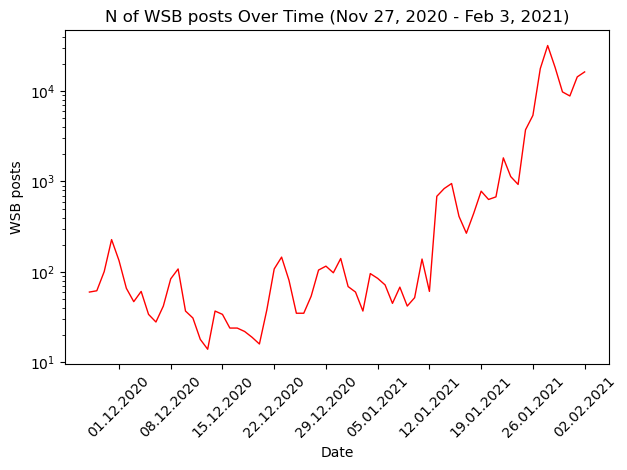

In [ ]:
plt.plot(posts_number['Date'], posts_number['n_posts'], marker='', linestyle='-', color='red', linewidth=1)
plt.title('N of WSB posts Over Time (Nov 27, 2020 - Feb 3, 2021)')
plt.xlabel('Date')
plt.ylabel('WSB posts')

plt.xticks(rotation=45)
x_dates = pd.date_range(start='2020-12-01', end='2021-02-02', freq='7D')
plt.xticks(x_dates, [date.strftime('%d.%m.%Y') for date in x_dates])

plt.yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
# Create a figure and axis for the first plot
fig, ax1 = plt.subplots()

# Plot the first data on the left y-axis
ax1.plot(posts_number['Date'], posts_number['n_posts'], marker='', linestyle='-', color='red', linewidth=1)
ax1.set_ylabel('WSB posts', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_yscale('log')

# Create a second y-axis on the left side
ax2 = ax1.twinx()

# Plot the second data on the right y-axis
ax2.plot(filtered_prices['Date'], filtered_prices['daily_change'], marker='', linestyle='-', color='steelblue', linewidth=1)
ax2.set_xlabel('Date')
ax2.set_ylabel('GME Daily Relative Change', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2.set_title('GME Daily Relative Change and WSB Posts (Nov 27, 2020 - Feb 3, 2021)')

# Format x-axis ticks
x_dates = pd.date_range(start='2020-12-01', end='2021-02-02', freq='7D')
ax1.set_xticks(x_dates)
ax1.set_xticklabels([date.strftime('%d.%m.%Y') for date in x_dates], rotation=45)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.95  # Adjust the length of the lines

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * 0.7, event_label, va='bottom', ha='center', color='gray')

# Ensure that the plots are properly displayed without overlap
plt.tight_layout()

# Show the combined plot
plt.show()



#### plot 2: (b) number of posts on WSB that showed financial commitment (flairs)

In [ ]:
# check flair marks in posts: gain, loss, YOLO in link_flair_css_class
### they do not have 'gain', only 'profit' flair

flair_counts = {'profit': 0, 'loss': 0, 'yolo': 0}

# Iterate through the data entries
for entry in submissions_data:
    author_flair = entry.get('link_flair_css_class')
    if author_flair in flair_counts:
        flair_counts[author_flair] += 1

# Print the counts for each flair
for flair, count in flair_counts.items():
    print(f"{flair}: {count} posts")

profit: 8106 posts
loss: 3091 posts
yolo: 24568 posts


In [ ]:
unique_flairs = set()

for entry in submissions_data:
    author_flair = entry.get('link_flair_css_class')
    if author_flair is not None:
        unique_flairs.add(author_flair)

unique_flairs

{'chart',
 'daily',
 'dd',
 'donation',
 'earnings',
 'fundamentals',
 'futures',
 'loss',
 'meme',
 'mods',
 'news',
 'options',
 'profit',
 'question',
 'satire',
 'shitpost',
 'stocks',
 'storytime',
 'technicals',
 'weekend',
 'yolo'}

In [ ]:
for entry in submissions_data:
    date_str = entry.get('date')
    if date_str:
        entry['date'] = datetime.strptime(date_str, '%Y-%m-%d').date()

In [ ]:
submissions_data[0]['date']

datetime.date(2020, 11, 27)

In [ ]:
dates = []
n_profit = []
n_loss = []
n_yolo = []

specific_flairs = ['profit', 'loss', 'yolo']

# Iterate through the data entries
for entry in submissions_data:
    date = entry.get('date')
    flair = entry.get('link_flair_css_class')

    if date is not None and flair in specific_flairs:
        dates.append(date)
        if flair == 'profit':
            n_profit.append(1)
            n_loss.append(0)
            n_yolo.append(0)
        elif flair == 'loss':
            n_profit.append(0)
            n_loss.append(1)
            n_yolo.append(0)
        elif flair == 'yolo':
            n_profit.append(0)
            n_loss.append(0)
            n_yolo.append(1)

# Create a pandas DataFrame
flair_counts_df = pd.DataFrame({
    'Date': dates,
    'n_profit': n_profit,
    'n_loss': n_loss,
    'n_yolo': n_yolo
})

# Group by date and sum the counts
flair_counts = flair_counts_df.groupby('Date').sum().reset_index()
flair_counts['financial_commitments'] = flair_counts['n_profit'] + flair_counts['n_loss'] + flair_counts['n_yolo']

In [ ]:
flair_counts

,Date,n_profit,n_loss,n_yolo,financial_commitments
0,2020-11-27,4,0,5,9
1,2020-11-28,0,1,5,6
2,2020-11-29,5,0,8,13
3,2020-11-30,12,4,31,47
4,2020-12-01,2,5,7,14
...,...,...,...,...,...
59,2021-01-29,904,215,3375,4494
60,2021-01-30,385,128,1280,1793
61,2021-01-31,374,93,1280,1747
62,2021-02-01,654,433,2723,3810


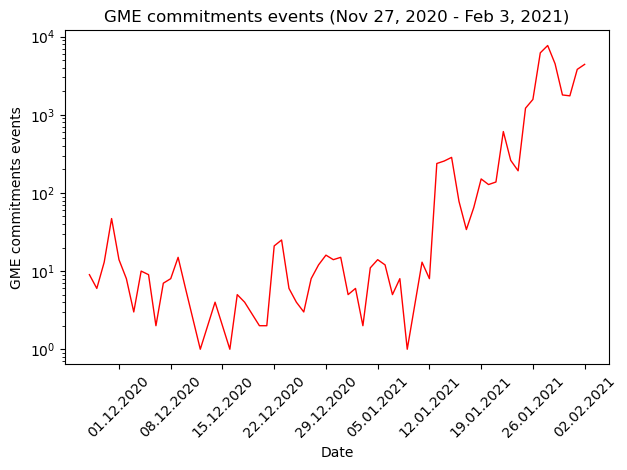

In [ ]:
plt.plot(flair_counts['Date'], flair_counts['financial_commitments'], marker='', linestyle='-', color='red', linewidth=1)
plt.title('GME commitments events (Nov 27, 2020 - Feb 3, 2021)')
plt.xlabel('Date')
plt.ylabel('GME commitments events')

plt.xticks(rotation=45)
x_dates = pd.date_range(start='2020-12-01', end='2021-02-02', freq='7D')
plt.xticks(x_dates, [date.strftime('%d.%m.%Y') for date in x_dates])

plt.yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
#Count of posts by flare and date
# Convert list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(posts)

# Filter rows to include only the flair classes you're interested in
df = df[df['link_flair_css_class'].isin(['profit', 'loss', 'yolo'])]

# Convert 'created_utc' to datetime format and remove time component
df['created_utc'] = pd.to_datetime(df['created_utc']).dt.date

# Group the data by 'created_utc' and 'link_flair_css_class' and count the number of occurrences
grouped_df = df.groupby(['created_utc', 'link_flair_css_class']).size().reset_index(name='count')

# Pivot the DataFrame so that 'link_flair_css_class' values become columns
pivot_df = grouped_df.pivot(index='created_utc', columns='link_flair_css_class', values='count').fillna(0)

# Plotting the data
plt.figure(figsize=(10, 6))

colors = {
    'profit': 'steelblue',
    'loss': 'lightseagreen',
    'yolo': 'rebeccapurple'
}

linestyle = {
    'profit': '--',
    'loss': '-.',
    'yolo': '-'
}

# Plot each line
for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column, color=colors[column], linestyle=linestyle[column])

plt.title('Count of Posts by Flair and Date', fontsize = 15, pad=20)
plt.ylabel('Events')

# Set y-axis to logarithmic scale
plt.yscale("log")

# Customize y-ticks
plt.yticks([1, 10**1, 10**2, 10**3, 10**4, 10**5], ['0', '$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])

# Get the current axis
ax = plt.gca()

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
line_length = 0.95  # Adjust the length of the lines

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax.text(event_date, ax.get_ylim()[1] * line_length, event_label, va='bottom', ha='center', color='gray')

# Move the legend to the middle of the plot
legend = plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.6), fancybox=False, shadow=False)

# Remove the legend border
legend.get_frame().set_linewidth(0.0)

# Remove the top and right spines by setting their color and linewidth to 'none'
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

for tick in ax.get_xticklabels():
    tick.set_rotation(50)

plt.show()

In [ ]:
fig, ax1 = plt.subplots()

# Plot the first data on the left y-axis
ax1.plot(flair_counts['Date'], flair_counts['financial_commitments'], marker='', linestyle='-',
         color='red', linewidth=1)
ax1.set_ylabel('GME commitments events', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_yscale('log')

# Create a second y-axis on the left side
ax2 = ax1.twinx()

# Plot the second data on the right y-axis
ax2.plot(filtered_prices['Date'], filtered_prices['daily_change'], marker='', linestyle='-', color='steelblue', linewidth=1)
ax2.set_xlabel('Date')
ax2.set_ylabel('GME Daily Relative Change', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2.set_title('GME commitments events (Nov 27, 2020 - Feb 3, 2021)')

# Format x-axis ticks
x_dates = pd.date_range(start='2020-12-01', end='2021-02-02', freq='7D')
ax1.set_xticks(x_dates)
ax1.set_xticklabels([date.strftime('%d.%m.%Y') for date in x_dates], rotation=45)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.95  # Adjust the length of the lines

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * 0.65, event_label, va='bottom', ha='center', color='gray')

plt.tight_layout()
plt.show()

#### plot 3: (c) level of group identity (shaded areas corresponds to two standard errors of the daily average).

- To measure the group identity: for each submission, we calculated the fraction of the first person pronouns that are the plural pronoun “we”, and averaged those fractions across all the submissions of a given day
-  we measure identity as the fraction of pronoun we against the number of both we and I pronouns occurring in each submission text body.

In [ ]:
removed_body = 0

for entry in submissions_data:
    body = entry.get('selftext')
    if body == '[deleted]' or body == '[removed]' or body == '':
        removed_body += 1

removed_body

130096

In [ ]:
submissions_data[5]

{'id': 'k1t3g8',
 'author': 'ryancus123',
 'author_flair_text': None,
 'link_flair_css_class': None,
 'num_comments': 58,
 'selftext': 'This isn’t getting enough attention.....biggest short squeeze of ALL TIME coming soon. Get in now\n\n1,000 shares at 12.50',
 'title': 'GameStop!!! 🚀 ✨ 🪐',
 'retrieved_utc': 1623089108,
 'url': 'https://www.reddit.com/r/wallstreetbets/comments/k1t3g8/gamestop/',
 'created_utc': '2020-11-27T04:01:26',
 'date': datetime.date(2020, 11, 27)}

In [ ]:
# Count occurrences of 'we' and 'I' in selftext

pattern = r'\bI\b'


for entry in submissions_data:
    selftext = entry.get('selftext', '')  # Default to an empty string if selftext is not present

    # Tokenize the selftext using the regular expression pattern
    tokens = re.findall(pattern, selftext, flags=re.IGNORECASE)

    # Count occurrences of 'we' and 'I'
    we_count = selftext.lower().count('we')
    i_count = len(tokens)

    entry['we_n'] = we_count
    entry['I_n'] = i_count

    # Set we_n and I_n to 0 if no occurrences are found
    if we_count == 0:
        entry['we_n'] = 0
    if i_count == 0:
        entry['I_n'] = 0


    if entry['we_n'] + entry['I_n'] != 0:
        entry['identity'] = entry['we_n'] / (entry['we_n'] + entry['I_n'])
    else:
        entry['identity'] = 0

In [ ]:
identity_not_null = 0

for entry in submissions_data:
    if entry['identity'] > 0:
        identity_not_null += 1

identity_not_null

4792

In [ ]:
date_identity_totals = {}
date_identity_counts = {}

for entry in submissions_data:
    date = entry.get('date')
    identity = entry.get('identity')

    if date is not None and identity is not None:
        if date not in date_identity_totals:
            date_identity_totals[date] = 0
            date_identity_counts[date] = 0

        date_identity_totals[date] += identity
        date_identity_counts[date] += 1

In [ ]:
average_identity_data = [{'date': date, 'average_identity': total / count}
                         for date in date_identity_totals.keys()
                         for total, count in [(date_identity_totals[date], date_identity_counts[date])]
                         if count > 0]

In [ ]:
average_identity_df = pd.DataFrame(average_identity_data)
average_identity_df

,date,average_identity
0,2020-11-27,0.088194
1,2020-11-28,0.135606
2,2020-11-29,0.058856
3,2020-11-30,0.040655
4,2020-12-01,0.091158
...,...,...
64,2021-01-30,0.012182
65,2021-01-31,0.008679
66,2021-02-01,0.008169
67,2021-02-02,0.019325


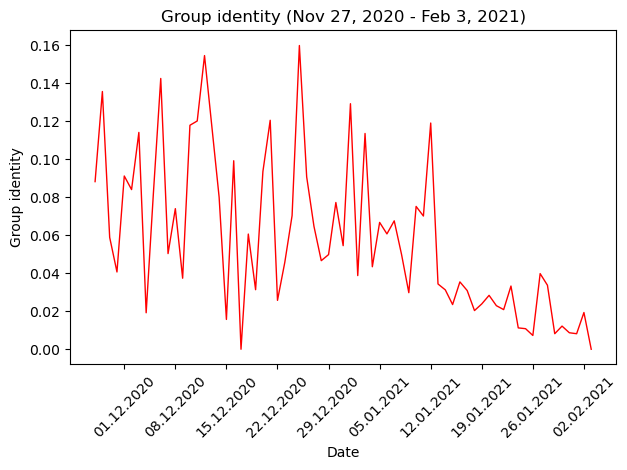

In [ ]:
plt.plot(average_identity_df['date'], average_identity_df['average_identity'], marker='',
         linestyle='-', color='red', linewidth=1)
plt.title('Group identity (Nov 27, 2020 - Feb 3, 2021)')
plt.xlabel('Date')
plt.ylabel('Group identity')

plt.xticks(rotation=45)
x_dates = pd.date_range(start='2020-12-01', end='2021-02-02', freq='7D')
plt.xticks(x_dates, [date.strftime('%d.%m.%Y') for date in x_dates])

plt.tight_layout()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

# Plot the first data on the left y-axis
ax1.plot(average_identity_df['date'], average_identity_df['average_identity'], marker='',
         linestyle='-', color='red', linewidth=1)
ax1.set_ylabel('Group identity', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a second y-axis on the left side
ax2 = ax1.twinx()

# Plot the second data on the right y-axis
ax2.plot(filtered_prices['Date'], filtered_prices['daily_change'], marker='', linestyle='-', color='steelblue', linewidth=1)
ax2.set_xlabel('Date')
ax2.set_ylabel('GME Daily Relative Change', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')
ax2.set_title('GME group identity (Nov 27, 2020 - Feb 3, 2021)')

# Format x-axis ticks
x_dates = pd.date_range(start='2020-12-01', end='2021-02-02', freq='7D')
ax1.set_xticks(x_dates)
ax1.set_xticklabels([date.strftime('%d.%m.%Y') for date in x_dates], rotation=45)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.95  # Adjust the length of the lines

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * line_length, event_label, va='bottom', ha='center', color='gray')


plt.tight_layout()
plt.show()

#### plot 4: level of group identity on the base of rewards

In [ ]:
#Count awards
awards = []

for post in posts:
    data = {}
    if len(post['all_awardings']) != 0:
        data['time'] = post['created_utc']
        count = 0
        for awardings in post['all_awardings']:
            price = awardings['count']
            count += price
        data['price'] = count
        awards.append(data)

award = pd.DataFrame(awards)
award['date'] = pd.to_datetime(award['time'])

award['date'] = pd.to_datetime(award['date']).dt.date

#group by date and count mean number of awards per post
pivot = award.groupby('date')['price'].mean()
pivot = pd.DataFrame(pivot).reset_index()

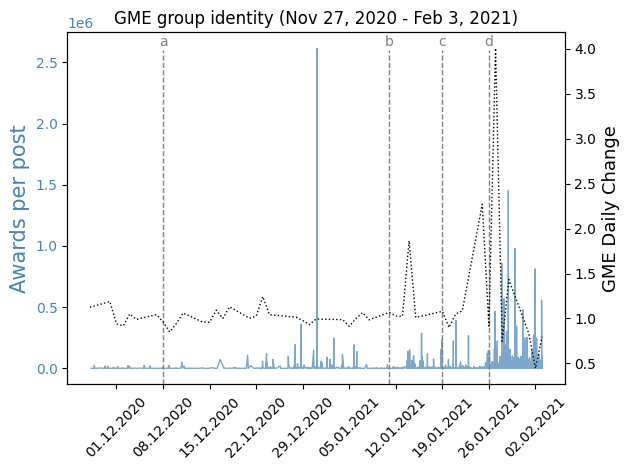

In [ ]:
fig, ax1 = plt.subplots()

plt.yscale('log')

# Plot the first data on the left y-axis
ax1.plot(pivot['date'], pivot['price'], marker='',
         linestyle='-', color='steelblue', linewidth=1, alpha=0.7)
ax1.set_ylabel('Awerage number of awards per post', color='steelblue', fontsize=10)
ax1.tick_params(axis='y', labelcolor='steelblue')

# Create a second y-axis on the left side
ax2 = ax1.twinx()

# Plot the second data on the right y-axis
ax2.plot(filtered_prices['Date'], filtered_prices['daily_change'], marker='', linestyle='dotted', color='black', linewidth=1)
ax2.set_xlabel('Date')
ax2.set_ylabel('GME Daily Change', color='black', fontsize=10)
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_title('GME group identity (Nov 27, 2020 - Feb 3, 2021)', pad=15)

# Format x-axis ticks
x_dates = pd.date_range(start='2020-12-01', end='2021-02-02', freq='7D')
ax1.set_xticks(x_dates)
ax1.set_xticklabels([date.strftime('%d.%m.%Y') for date in x_dates], rotation=45)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.95  # Adjust the length of the lines

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * line_length, event_label, va='bottom', ha='center', color='gray')


plt.tight_layout()
plt.show();

# 3 Building Network

In [ ]:
with open('output2.json', 'r') as f:
    posts = json.load(f)

with open('filtered_comments.json', 'r') as f:
    comments = json.load(f)

for d in comments:
    if 'parent_id' in d:
        d['parent_id'] = d['parent_id'][3:]
        d['link_id'] = d['link_id'][3:]

for post in comments:
    try:
        utc_timestamp = int(post['created_utc'])  # Try to convert to integer
        post['created_utc'] = datetime.fromtimestamp(utc_timestamp).strftime('%Y-%m-%d %H:%M:%S')
    except ValueError:  # Skip if conversion fails
        pass

    post['created_utc'] = datetime.strptime(post['created_utc'], '%Y-%m-%d %H:%M:%S')

start_date = datetime(2020, 11, 27, 0, 0, 0)
end_date = datetime(2021, 2, 3, 23, 59, 59)

comments = [item for item in comments if start_date <= item['created_utc'] <= end_date]

comments = sorted(comments, key=lambda x: x['created_utc'])

## 3.1 The whole network

In [ ]:
G = nx.DiGraph()

# Create a dictionary for fast lookup
post_dict = {d['id']: d for d in posts}
comment_dict = {d['id']: d for d in comments}

for comment in comments:
    author = comment['author']
    parent_id = comment['parent_id']

    # Efficiently find parent comment or post
    parent_comment = post_dict.get(parent_id, comment_dict.get(parent_id, None))

    if parent_comment is None:
        print(f"Parent not found for id {parent_id}")
        continue

    author_parent = parent_comment['author']

    # Add nodes and edge
    G.add_node(author)
    G.add_node(author_parent)
    G.add_edge(author, author_parent)

In [ ]:
G.number_of_nodes()

In [ ]:
G.number_of_edges()

## 3.2 Window of 3000 nodes

## 3.3 Slice Jan 8-12

In [ ]:
# Define the target date and time range
start_date = datetime.strptime('2021-01-08', '%Y-%m-%d').date()
end_date = datetime.strptime('2021-01-12', '%Y-%m-%d').date()
start_time = time(1, 0)
end_time = time(18, 0)

filtered_comments = []

for post in comments:
    created_utc = post['created_utc']

    if not isinstance(created_utc, datetime):
        try:
            # Try the first format
            created_utc = datetime.strptime(post['created_utc'], '%Y-%m-%d %H:%M:%S')
        except ValueError:
            try:
                # Try the second format
                created_utc = datetime.strptime(post['created_utc'], '%Y-%m-%dT%H:%M:%S')
            except ValueError:
                # Handle other errors, such as skipping the item or raising an error
                print(f"Unknown datetime format for {post['created_utc']}")
                continue

    # Extract date and time
    post_date = created_utc.date()
    post_time = created_utc.time()

    # Check if the post falls within the target date and time range
    if start_date <= post_date <= end_date and start_time <= post_time <= end_time:
        filtered_comments.append(post)

In [ ]:
# Visualisation with Networkx
G = nx.Graph()

# Create a dictionary for fast lookup
post_dict = {d['id']: d for d in posts}
comment_dict = {d['id']: d for d in comments}

for comment in filtered_comments:
    author = comment['author']
    parent_id = comment['parent_id']

    # Efficiently find parent comment or post
    parent_comment = post_dict.get(parent_id, comment_dict.get(parent_id, None))

    if parent_comment is None:
        print(f"Parent not found for id {parent_id}")
        continue

    author_parent = parent_comment['author']

    # Determine node color based on link_flair_css_class
    flair_class = parent_comment.get('link_flair_css_class', None)
    if flair_class in ['profit', 'loss', 'yolo']:
        node_color = 'red'
    else:
        node_color = 'lightgray'

    G.add_node(author, color='lightgray')
    G.add_node(author_parent, color=node_color)  # Note: This will overwrite the color if the node already exists
    G.add_edge(author, author_parent)

# Remove self-loops from the graph if they exist
G.remove_edges_from(nx.selfloop_edges(G))

# Calculate the k-shell value for each node
k_shell = nx.core_number(G)

# Create a mapping of node sizes based on k-shell values
node_sizes = [2**k_shell[node] for node in G.nodes()]

In [ ]:
# Create a new figure
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the graph with spring_layout
pos = nx.spring_layout(G, k=0.05)

# Separate red and non-red nodes
red_nodes = [node for node, data in G.nodes(data=True) if data.get('color') == 'red']
non_red_nodes = [node for node, data in G.nodes(data=True) if data.get('color') != 'red']

#set size
red_sizes = [2**k_shell[node] for node in red_nodes]
non_red_sizes = [2**k_shell[node] for node in non_red_nodes]

# Draw non-red nodes first
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=non_red_nodes,
    node_color='lightgray',
    node_size=non_red_sizes,
    ax=ax
)

# Draw red nodes on top
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=red_nodes,
    node_color='firebrick',
    node_size=red_sizes,
    ax=ax
)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=0.3, ax=ax)
ax.collections[0].set_edgecolor("darkgray")

# Remove the border of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the graph
plt.show();

In [ ]:
# Visualisation with pyvis
G = nx.DiGraph()

# Create a dictionary for fast lookup
post_dict = {d['id']: d for d in posts}
comment_dict = {d['id']: d for d in comments}

for comment in filtered_comments:
    author = comment['author']
    parent_id = comment['parent_id']

    # Efficiently find parent comment or post
    parent_comment = post_dict.get(parent_id, comment_dict.get(parent_id, None))

    if parent_comment is None:
        print(f"Parent not found for id {parent_id}")
        continue

    author_parent = parent_comment['author']

    # Determine node color based on link_flair_css_class
    flair_class = parent_comment.get('link_flair_css_class', None)
    if flair_class in ['profit', 'loss', 'yolo']:
        node_color = 'red'
    else:
        node_color = 'grey'

    G.add_node(author, color={'border': 'darkgrey', 'background': 'grey'})
    G.add_node(author_parent, color={'border': 'darkgrey', 'background': node_color})  # Note: This will overwrite the color if the node already exists
    G.add_edge(author, author_parent)

# Remove self-loops from the graph if they exist
G.remove_edges_from(nx.selfloop_edges(G))

# Calculate the k-shell value for each node
k_shell = nx.core_number(G)

# Add the k-shell values as attributes to the nodes
nx.set_node_attributes(G, k_shell, 'value')

# Determine the maximum k-shell value in the graph
max_k_shell = max(k_shell.values())

# Define a scaling factor for node size
size_scale = 4  # You can adjust this value based on your preferences

# Create a mapping of node sizes based on k-shell values
node_sizes = [size_scale * (max_k_shell - k_shell[node] + 1) for node in G.nodes()]

In [ ]:
net = Network(notebook=True)
net.from_nx(G)
net.show('example1.html')

## 3.4 Slice Jan 21, 16h-17h

In [ ]:
# Define the target date and time range
start_date = datetime.strptime('2021-01-21', '%Y-%m-%d').date()
end_date = datetime.strptime('2021-01-21', '%Y-%m-%d').date()
start_time = time(16, 0)
end_time = time(17, 30)

filtered_comments = []

for post in comments:
    created_utc = post['created_utc']

    if not isinstance(created_utc, datetime):
        try:
            # Try the first format
            created_utc = datetime.strptime(post['created_utc'], '%Y-%m-%d %H:%M:%S')
        except ValueError:
            try:
                # Try the second format
                created_utc = datetime.strptime(post['created_utc'], '%Y-%m-%dT%H:%M:%S')
            except ValueError:
                # Handle other errors, such as skipping the item or raising an error
                print(f"Unknown datetime format for {post['created_utc']}")
                continue

    # Extract date and time
    post_date = created_utc.date()
    post_time = created_utc.time()

    # Check if the post falls within the target date and time range
    if start_date <= post_date <= end_date and start_time <= post_time <= end_time:
        filtered_comments.append(post)

In [ ]:
G = nx.DiGraph()

# Create a dictionary for fast lookup
post_dict = {d['id']: d for d in posts}
comment_dict = {d['id']: d for d in comments}

for comment in filtered_comments:
    author = comment['author']
    parent_id = comment['parent_id']

    # Efficiently find parent comment or post
    parent_comment = post_dict.get(parent_id, comment_dict.get(parent_id, None))

    if parent_comment is None:
        print(f"Parent not found for id {parent_id}")
        continue

    author_parent = parent_comment['author']

    # Determine node color based on link_flair_css_class
    flair_class = parent_comment.get('link_flair_css_class', None)
    if flair_class in ['profit', 'loss', 'yolo']:
        node_color = 'red'
    else:
        node_color = 'grey'

    G.add_node(author, color={'border': 'darkgrey', 'background': 'grey'})
    G.add_node(author_parent, color={'border': 'darkgrey', 'background': node_color})  # Note: This will overwrite the color if the node already exists
    G.add_edge(author, author_parent)

# Remove self-loops from the graph if they exist
G.remove_edges_from(nx.selfloop_edges(G))

# Calculate the k-shell value for each node
k_shell = nx.core_number(G)

# Add the k-shell values as attributes to the nodes
nx.set_node_attributes(G, k_shell, 'value')

# Determine the maximum k-shell value in the graph
max_k_shell = max(k_shell.values())

# Define a scaling factor for node size
size_scale = 4  # You can adjust this value based on your preferences

# Create a mapping of node sizes based on k-shell values
node_sizes = [size_scale * (max_k_shell - k_shell[node] + 1) for node in G.nodes()]

In [ ]:
net = Network(notebook=True)
net.from_nx(G)
net.show('example.html')

## 3.5 Slice Jan 23, 8h-14h

In [ ]:
# Define the target date and time range
start_date = datetime.strptime('2021-01-23', '%Y-%m-%d').date()
end_date = datetime.strptime('2021-01-23', '%Y-%m-%d').date()
start_time = time(8, 0)
end_time = time(14, 30)

filtered_comments = []

for post in comments:  # Assuming 'comments' is a list of dictionaries containing 'created_utc'
    # Ensure the 'created_utc' is a datetime object, convert it if it's a string or timestamp
    created_utc = post['created_utc']

    if not isinstance(created_utc, datetime):
        try:
            # Try the first format
            created_utc = datetime.strptime(post['created_utc'], '%Y-%m-%d %H:%M:%S')
        except ValueError:
            try:
                # Try the second format
                created_utc = datetime.strptime(post['created_utc'], '%Y-%m-%dT%H:%M:%S')
            except ValueError:
                # Handle other errors, such as skipping the item or raising an error
                print(f"Unknown datetime format for {post['created_utc']}")
                continue

    # Extract date and time
    post_date = created_utc.date()
    post_time = created_utc.time()

    # Check if the post falls within the target date and time range
    if start_date <= post_date <= end_date and start_time <= post_time <= end_time:
        filtered_comments.append(post)

In [ ]:
G = nx.DiGraph()

# Create a dictionary for fast lookup
post_dict = {d['id']: d for d in posts}
comment_dict = {d['id']: d for d in comments}

for comment in filtered_comments:
    author = comment['author']
    parent_id = comment['parent_id']

    # Efficiently find parent comment or post
    parent_comment = post_dict.get(parent_id, comment_dict.get(parent_id, None))

    if parent_comment is None:
        print(f"Parent not found for id {parent_id}")
        continue

    author_parent = parent_comment['author']

    # Determine node color based on link_flair_css_class
    flair_class = parent_comment.get('link_flair_css_class', None)
    if flair_class in ['profit', 'loss', 'yolo']:
        node_color = 'red'
    else:
        node_color = 'grey'

    G.add_node(author, color={'border': 'darkgrey', 'background': 'grey'})
    G.add_node(author_parent, color={'border': 'darkgrey', 'background': node_color})  # Note: This will overwrite the color if the node already exists
    G.add_edge(author, author_parent)

# Remove self-loops from the graph if they exist
G.remove_edges_from(nx.selfloop_edges(G))

# Calculate the k-shell value for each node
k_shell = nx.core_number(G)

# Add the k-shell values as attributes to the nodes
nx.set_node_attributes(G, k_shell, 'value')

# Determine the maximum k-shell value in the graph
max_k_shell = max(k_shell.values())

# Define a scaling factor for node size
size_scale = 4  # You can adjust this value based on your preferences

# Create a mapping of node sizes based on k-shell values
node_sizes = [size_scale * (max_k_shell - k_shell[node] + 1) for node in G.nodes()]

In [ ]:
net = Network(notebook=True)
net.from_nx(G)
net.show('example.html')

## 4. Metrics

In [ ]:
# Prepare data
G = nx.DiGraph()
reciprocity = []
heterogeneity_1 = []
heterogeneity_2 = []
average_degrees = []
data = []

post_dict = {d['id']: d for d in posts}
comment_dict = {d['id']: d for d in comments}

first_date = comments[0]['created_utc']
last_date = comments[-1]['created_utc']
next_date = first_date

current_date = first_date

while next_date <= last_date:
    next_date = current_date + timedelta(days=7)

    # Efficient slicing using list comprehensions
    comments_in_window = [comment for comment in comments if current_date <= comment['created_utc'] < next_date]

    edges_to_add = []

    for comment in comments_in_window:
        author = comment['author']
        parent_id = comment['parent_id']

        parent_comment = post_dict.get(parent_id, comment_dict.get(parent_id, None))

        if parent_comment is None:
            print(f"Parent not found for id {parent_id}")
            continue

        author_parent = parent_comment['author']
        edges_to_add.append((author, author_parent))

    G.add_edges_from(edges_to_add)

    # Check if the graph is not empty

    if len(G) > 0:
        reciprocity.append(nx.reciprocity(G))

        total_degree = sum(dict(G.degree()).values())
        average_degree = total_degree / len(G)
        average_degrees.append(average_degree)

        degrees = np.array([d for n, d in G.degree()])
        N = len(degrees)

        if N > 0:  # Check to prevent division by zero
            first_moment = np.mean(degrees)
            second_moment = np.mean(degrees ** 2)
            kappa = second_moment / (first_moment ** 2)
            heterogeneity_1.append(kappa)
            heterogeneity_2.append(np.var(degrees)/(first_moment ** 2))

    data.append(next_date)
    G.clear()

    # Move to the next 1-day window
    current_date = current_date + timedelta(days=1)

In [ ]:
rolling_window = 2  # 7-day rolling window
df = pd.DataFrame({'reciprocity': reciprocity, 'heterogeneity_1': heterogeneity_1, 'heterogeneity_2': heterogeneity_2, 'date': data, 'log_heterogeneity_2': np.log(heterogeneity_2), 'average_degrees': average_degrees})
df.set_index('date', inplace=True)
rolling_mean = df.rolling(window=rolling_window).mean()
rolling_std = df.rolling(window=rolling_window).std()

upper_bound = rolling_mean + 2 * rolling_std
lower_bound = rolling_mean - 2 * rolling_std

In [ ]:
lower = lower_bound['reciprocity']
upper = upper_bound['reciprocity']

plt.plot(data, reciprocity)
ax1 = plt.gca()  # Get current axis

# Adding shaded area for 2 standard deviations around the mean
plt.fill_between(data, lower, upper, color='lightblue', alpha=0.5)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.90

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * 0.97, event_label, va='bottom', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()

In [ ]:
lower = lower_bound['heterogeneity_1']
upper = upper_bound['heterogeneity_1']

plt.plot(data, heterogeneity_1, color = 'red')
ax1 = plt.gca()  # Get current axis

# Adding shaded area for 2 standard deviations around the mean
plt.fill_between(data, lower, upper, color='#FF8080', alpha=0.5)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.90

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * 0.92, event_label, va='bottom', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()

In [ ]:
lower = lower_bound['heterogeneity_2']
upper = upper_bound['heterogeneity_2']

plt.plot(data, heterogeneity_2, color = 'red')
ax1 = plt.gca()  # Get current axis

# Adding shaded area for 2 standard deviations around the mean
plt.fill_between(data, lower, upper, color='#FF8080', alpha=0.5)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.90

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * 0.92, event_label, va='bottom', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()

In [ ]:
lower = lower_bound['log_heterogeneity_2']
upper = upper_bound['log_heterogeneity_2']

plt.plot(data, np.log(heterogeneity_2), color = 'red')
ax1 = plt.gca()  # Get current axis

# Adding shaded area for 2 standard deviations around the mean
plt.fill_between(data, lower, upper, color='#FF8080', alpha=0.5)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.90

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * 0.92, event_label, va='bottom', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()

In [ ]:
lower = lower_bound['average_degrees']
upper = upper_bound['average_degrees']

plt.plot(data, average_degrees, color = 'purple')
ax1 = plt.gca()  # Get current axis

# Adding shaded area for 2 standard deviations around the mean
plt.fill_between(data, lower, upper, color='#AB82FF', alpha=0.5)

# Add dashed lines for events with adjusted length
event_dates = ['08.12.2020', '11.01.2021', '19.01.2021', '26.01.2021']
event_labels = ['a', 'b', 'c', 'd']
line_length = 0.90

for event_date, event_label in zip(event_dates, event_labels):
    event_date = pd.to_datetime(event_date, format='%d.%m.%Y')
    ax1.axvline(event_date, color='gray', linestyle='--', linewidth=1, ymin=0, ymax=line_length)
    ax1.text(event_date, ax1.get_ylim()[1] * 0.92, event_label, va='bottom', ha='center', color='black')

plt.xticks(rotation=45)
plt.show()